<a href="https://colab.research.google.com/github/Ayush-Porwal/kaggle-digit-recognizer/blob/master/digit_recognizer_with_augmentations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import csv
import numpy as np
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
train_file_path = '/content/drive/My Drive/Colab Notebooks/kaggle-datasets/digit-recognizer/train.csv'
test_file_path = '/content/drive/My Drive/Colab Notebooks/kaggle-datasets/digit-recognizer/test.csv'

In [10]:
def get_train_test_data(train_file_path, test_file_path):
  
  with open(train_file_path) as train_file:
    train_images = []
    train_labels = []
    
    train_reader = csv.reader(train_file)
    next(train_reader)
    
    for row in train_reader:
      train_labels.append(row[0])
      train_images.append(np.array(row[1:]).reshape(28,28))
  
  with open(test_file_path) as test_file:
    test_images = []
    test_labels = []

    test_reader = csv.reader(test_file)
    next(test_reader)

    for row in test_reader:
      test_images.append(np.array(row[0:]).reshape(28,28))
  
  return np.array(train_images).astype(float), np.array(train_labels).astype(float), np.array(test_images).astype(float)/255

In [13]:
train_images, train_labels, test_images = get_train_test_data(train_file_path, test_file_path)

train_labels = np_utils.to_categorical(train_labels)
train_images = np.expand_dims(train_images, axis = 3)
test_images = np.expand_dims(test_images, axis = 3)

print(f'The shape of train_images is: {train_images.shape}')
print(f'The shape of train_labels is: {train_labels.shape}')
print(f'The shape of test_images is: {test_images.shape}')

data_generator = ImageDataGenerator(
    rescale = 1/255.0,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    validation_split=0.1
)

The shape of train_images is: (42000, 28, 28, 1)
The shape of train_labels is: (42000, 10)
The shape of test_images is: (28000, 28, 28, 1)


In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape = (28,28,1), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               2769408   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 2,774,858
Trainable params: 2,774,858
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit_generator(
    data_generator.flow(train_images, train_labels, subset='training', batch_size=32),
    validation_data = data_generator.flow(train_images, train_labels, subset='validation', batch_size=32),
    epochs=20,
    verbose=1
)

Epoch 1/20
1182/1182 [==============================] - 58s 49ms/step - loss: 0.3234 - accuracy: 0.8991 - val_loss: 0.1524 - val_accuracy: 0.9552
Epoch 2/20
1182/1182 [==============================] - 62s 52ms/step - loss: 0.1254 - accuracy: 0.9613 - val_loss: 0.1045 - val_accuracy: 0.9674
Epoch 3/20
1182/1182 [==============================] - 58s 49ms/step - loss: 0.0956 - accuracy: 0.9706 - val_loss: 0.0827 - val_accuracy: 0.9726
Epoch 4/20
1182/1182 [==============================] - 60s 51ms/step - loss: 0.0803 - accuracy: 0.9752 - val_loss: 0.0748 - val_accuracy: 0.9783
Epoch 5/20
1182/1182 [==============================] - 60s 50ms/step - loss: 0.0716 - accuracy: 0.9773 - val_loss: 0.0673 - val_accuracy: 0.9783
Epoch 6/20
1182/1182 [==============================] - 59s 50ms/step - loss: 0.0631 - accuracy: 0.9803 - val_loss: 0.0611 - val_accuracy: 0.9802
Epoch 7/20
1182/1182 [==============================] - 60s 50ms/step - loss: 0.0582 - accuracy: 0.9821 - val_loss: 0.0608 -

Text(0, 0.5, 'Accuracy')

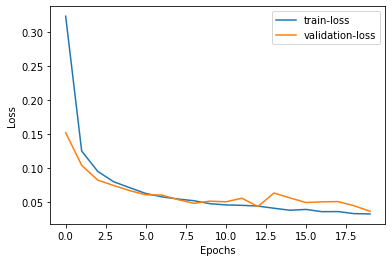

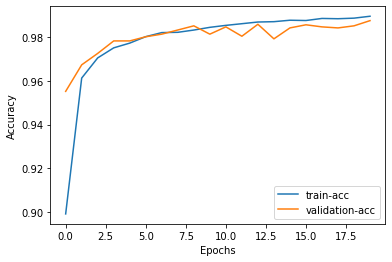

In [19]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

plt.figure()
plt.plot(range(len(train_loss)), train_loss, '-', label = 'train-loss')
plt.plot(range(len(val_loss)), val_loss, '-', label = 'validation-loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.figure()
plt.plot(range(len(train_acc)), train_acc, '-', label = 'train-acc')
plt.plot(range(len(val_acc)), val_acc, '-', label = 'validation-acc')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [20]:
import pandas as pd
results = model.predict(test_images)
results = np.argmax(results, axis = 1)

results = pd.Series(results, name = 'Label')
submission = pd.concat([pd.Series(range(1,28001), name = 'ImageId'), results], axis = 1)
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,8
4,5,3


In [21]:
submission.to_csv('submission.csv', index=False)